# Introdução ao  Python com Ciência de Dados

Professores:
* Felipe Cavenaghi
* Rafael Stoffalette Joao

## Ementa
1. Python: 
  * Ambiente de Programação
  * tipos de dados, sequências e operações, estruturas de controle e repetição
  * Python: referências, funções, funções avançadas e comprehention
  * Python: I/O e noções básicas de classes e objetos
2. Numpy: 
   * array, slicing, fancy index, copy e view
   * operações com array, broadcasting
3. Pandas: 
   * dataframes, series, index, Pandas I/O (csv, json, excell)
   * limpeza de dados
4. Matplotlib:  construção de gráficos
5. Introdução ao aprendizado de máquina
6. Introdução ao processamento de linguagem Natural com NTKL

# Pandas, Numpy e MatPlotLib

* Eleições primeiro Turno


In [ ]:
import pandas as pd
from matplotlib import pyplot as plt

#planilhas com os dados do primeiro turno das elecições municipais disponíveis em 
#https://www.tse.jus.br/eleicoes/estatisticas/repositorio-de-dados-eleitorais-1/repositorio-de-dados-eleitorais

#Planilha com os dados do primeiro turno das eleições municipais do estado de são paulo

df_dadosEleicao = pd.read_csv('../dataset/dadosEleitorais/votacao_partido_munzona_2020_SP.csv',encoding = "Latin 1", sep=';')

#df_dadosEleicao = pd.read_csv('../dataset/dadosEleitorais/votacao_partido_munzona_2020_SP.csv',encoding = "Latin 1", sep=';')

df_dadosEleicao.columns

Index(['DT_GERACAO', 'HH_GERACAO', 'ANO_ELEICAO', 'CD_TIPO_ELEICAO',
       'NM_TIPO_ELEICAO', 'NR_TURNO', 'CD_ELEICAO', 'DS_ELEICAO', 'DT_ELEICAO',
       'TP_ABRANGENCIA', 'SG_UF', 'SG_UE', 'NM_UE', 'CD_MUNICIPIO',
       'NM_MUNICIPIO', 'NR_ZONA', 'CD_CARGO', 'DS_CARGO', 'TP_AGREMIACAO',
       'NR_PARTIDO', 'SG_PARTIDO', 'NM_PARTIDO', 'SQ_COLIGACAO',
       'NM_COLIGACAO', 'DS_COMPOSICAO_COLIGACAO', 'ST_VOTO_EM_TRANSITO',
       'QT_VOTOS_NOMINAIS', 'QT_VOTOS_LEGENDA'],
      dtype='object')

In [ ]:
# Consigo visualizar
df_dadosEleicao.head()

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,NR_TURNO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,TP_ABRANGENCIA,...,TP_AGREMIACAO,NR_PARTIDO,SG_PARTIDO,NM_PARTIDO,SQ_COLIGACAO,NM_COLIGACAO,DS_COMPOSICAO_COLIGACAO,ST_VOTO_EM_TRANSITO,QT_VOTOS_NOMINAIS,QT_VOTOS_LEGENDA
0,26/11/2020,11:39:02,2020,2,Eleição Ordinária,1,426,Eleições Municipais 2020,15/11/2020,M,...,Partido isolado,55,PSD,Partido Social Democrático,250000143152,PARTIDO ISOLADO,PSD,N,10,1
1,26/11/2020,11:39:02,2020,2,Eleição Ordinária,1,426,Eleições Municipais 2020,15/11/2020,M,...,Partido isolado,55,PSD,Partido Social Democrático,250000120047,PARTIDO ISOLADO,PSD,N,5025,186
2,26/11/2020,11:39:02,2020,2,Eleição Ordinária,1,426,Eleições Municipais 2020,15/11/2020,M,...,Partido isolado,55,PSD,Partido Social Democrático,250000063109,PARTIDO ISOLADO,PSD,N,2087,311
3,26/11/2020,11:39:02,2020,2,Eleição Ordinária,1,426,Eleições Municipais 2020,15/11/2020,M,...,Partido isolado,55,PSD,Partido Social Democrático,250000128538,PARTIDO ISOLADO,PSD,N,688,82
4,26/11/2020,11:39:02,2020,2,Eleição Ordinária,1,426,Eleições Municipais 2020,15/11/2020,M,...,Partido isolado,55,PSD,Partido Social Democrático,250000107132,PARTIDO ISOLADO,PSD,N,216,5


In [ ]:
# Um pouco de estatística decritiva, mas não dá para concluir nada ainda
# Além de não fazer sentido para grande parte das colunas
print(df_dadosEleicao.describe())

       ANO_ELEICAO  CD_TIPO_ELEICAO  NR_TURNO  CD_ELEICAO         SG_UE  \
count      13111.0          13111.0   13111.0     13111.0  13111.000000   
mean        2020.0              2.0       1.0       426.0  67530.128060   
std            0.0              0.0       0.0         0.0   3569.409828   
min         2020.0              2.0       1.0       426.0  61000.000000   
25%         2020.0              2.0       1.0       426.0  64351.000000   
50%         2020.0              2.0       1.0       426.0  68276.000000   
75%         2020.0              2.0       1.0       426.0  71072.000000   
max         2020.0              2.0       1.0       426.0  72737.000000   

       CD_MUNICIPIO       NR_ZONA      CD_CARGO    NR_PARTIDO  SQ_COLIGACAO  \
count  13111.000000  13111.000000  13111.000000  13111.000000  1.311100e+04   
mean   67530.128060    214.947067     12.433605     31.868279  2.500001e+11   
std     3569.409828    126.005952      0.901137     19.645667  3.142238e+04   
min    6

In [ ]:
#Seleção das colunas com as quais vou fazer mminha analise
df_EleicaoVotos = df_dadosEleicao.loc[:, ['NM_MUNICIPIO','QT_VOTOS_NOMINAIS','SG_PARTIDO','QT_VOTOS_LEGENDA']]
df_EleicaoVotos.sample(5)

,NM_MUNICIPIO,QT_VOTOS_NOMINAIS,SG_PARTIDO,QT_VOTOS_LEGENDA
140,SOROCABA,490,CIDADANIA,44
6102,IRACEMÁPOLIS,1302,PODE,17
6748,PRADÓPOLIS,1150,PSC,16
4965,ITAPETININGA,5736,PP,192
4787,JUMIRIM,120,CIDADANIA,0


In [ ]:
# Nada de novo, mas já está um pouco mais organizado e com algum sentido
print(df_EleicaoVotos.describe())

       QT_VOTOS_NOMINAIS  QT_VOTOS_LEGENDA
count       13111.000000      13111.000000
mean         2912.401571        118.559530
std          5335.991937        363.591211
min             0.000000          0.000000
25%           499.000000          0.000000
50%          1265.000000         22.000000
75%          3067.000000         77.000000
max        105494.000000       6299.000000


In [ ]:
# Para manipulação direta, melhor um NumPy array

# df.values: retorna um numpay array com os valores do data frame
npVotacaoLegenda = df_EleicaoVotos.values

print("==============NumpyArray=============== ")
print(npVotacaoLegenda)
print(npVotacaoLegenda.shape)


==============NumpyArray=============== 
[['PONTALINDA' 10 'PSD' 1]
 ['SÃO PAULO' 5025 'PSD' 186]
 ['PITANGUEIRAS' 2087 'PSD' 311]
 ...
 ['CEDRAL' 262 'PSDB' 3]
 ['SANTO ANDRÉ' 1786 'PATRIOTA' 89]
 ['SÃO PAULO' 2674 'PATRIOTA' 762]]
(13111, 4)


In [ ]:
# Se eu quiser o total de votos por legenda, no país todo
# Uma forma é percorrer o numpy array e agregar esses votos em um dicionário {legenda: Votos}, por exemplo

# criando um dicionário com os votos por legenda
VotoLegenda = dict()

# percorrendo o numpy array, recuperando a sigla do partido e quantidade de votos por legenda
for linha in npVotacaoLegenda:
    
    legenda = linha[2]
    
    qtdeNominal = linha[1]
    qtdeLegenda = linha[3]
    
    
    if legenda in VotoLegenda:
        VotoLegenda[legenda] += qtdeLegenda
    else:
        VotoLegenda[legenda] = qtdeLegenda

print("==============Dicionario=============== ")
#Dicionários com os votos por legenda
print(VotoLegenda)


==============Dicionario=============== 
{'PSD': 79631, 'PC do B': 4990, 'SOLIDARIEDADE': 11857, 'AVANTE': 9148, 'PROS': 3488, 'REPUBLICANOS': 88961, 'PDT': 37802, 'PTB': 43197, 'PSL': 45335, 'PODE': 48538, 'PL': 54035, 'PRTB': 12686, 'PMN': 2957, 'PMB': 1911, 'PSB': 79761, 'MDB': 72565, 'PSDB': 391832, 'PATRIOTA': 57602, 'PT': 180740, 'REDE': 7367, 'DEM': 60245, 'PTC': 4613, 'PV': 16410, 'PSOL': 108599, 'PP': 41446, 'PSC': 11430, 'PCB': 1406, 'CIDADANIA': 24502, 'DC': 2679, 'PCO': 575, 'NOVO': 45124, 'UP': 745, 'PSTU': 2257}


In [ ]:
# tratados os dados, posso criar um novo dataframe

# Da frame com cada linha sendo uma legenda
dfVotoLeg = pd.DataFrame({"quatidade": VotoLegenda})
dfVotoLeg


,quatidade
AVANTE,9148
CIDADANIA,24502
DC,2679
DEM,60245
MDB,72565
NOVO,45124
PATRIOTA,57602
PC do B,4990
PCB,1406
PCO,575


==============Estatísticas=============== 
           quatidade
count      33.000000
mean    47104.060606
std     73635.184554
min       575.000000
25%      4613.000000
50%     24502.000000
75%     57602.000000
max    391832.000000
==============Gráfico=============== 


<AxesSubplot:>

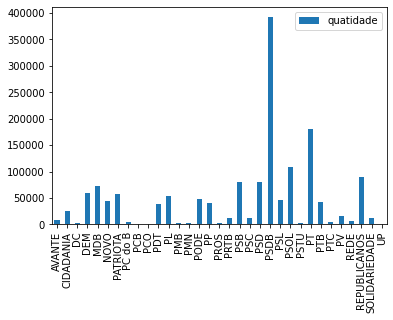

In [ ]:
# e agora volto para as funções do dataframe (que algumas, também tinhamos no NumPy array, 
#aliás....mas no processo passamos a manipular um dicioonário)

print("==============Estatísticas=============== ")
print(dfVotoLeg.describe())

print("==============Gráfico=============== ")
dfVotoLeg.plot.bar()

,QT_VOTOS_NOMINAIS,QT_VOTOS_LEGENDA
SG_PARTIDO,,
AVANTE,445847,9148
CIDADANIA,976529,24502
DC,103987,2679
DEM,2265793,60245
MDB,2250036,72565


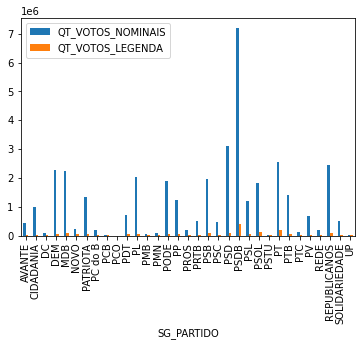

In [ ]:
# Mas se eu pesquisar um pouquinho por agrupamento em pandas
df_EleicaoVotos.groupby(['SG_PARTIDO']).sum().plot.bar()

dfAgrupadoPorVoto = df_EleicaoVotos.groupby(['SG_PARTIDO']).sum()
dfAgrupadoPorVoto.head()

<AxesSubplot:xlabel='SG_PARTIDO'>

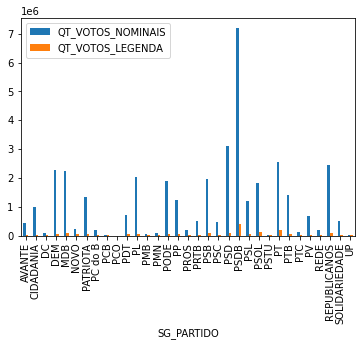

In [ ]:
# Tá, mas vamos ver o que um dataFrame pode me oferecer então...


# Se eu pesquisar um pouquinho por agrupamento em pandas
df_EleicaoVotos.groupby(['SG_PARTIDO']).sum().plot.bar()

In [ ]:
# Alguns resultados e manipulações
dfAgrupadoPorVoto = df_EleicaoVotos.groupby(['SG_PARTIDO']).sum()
dfAgrupadoPorVoto.head()

,QT_VOTOS_NOMINAIS,QT_VOTOS_LEGENDA
SG_PARTIDO,,
AVANTE,445847,9148
CIDADANIA,976529,24502
DC,103987,2679
DEM,2265793,60245
MDB,2250036,72565


       QT_VOTOS_NOMINAIS  QT_VOTOS_LEGENDA
count       3.300000e+01         33.000000
mean        1.157106e+06      47104.060606
std         1.419920e+06      73635.184554
min         5.380000e+02        575.000000
25%         1.748190e+05       4613.000000
50%         6.871930e+05      24502.000000
75%         1.907648e+06      57602.000000
max         7.186449e+06     391832.000000
/opt/venv/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='SG_PARTIDO'>

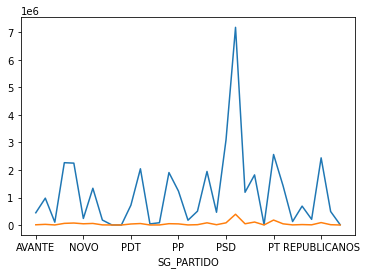

In [ ]:
# Estatística Descritiva
print(dfAgrupadoPorVoto.describe())

# E mais gráficos
dfAgrupadoPorVoto.QT_VOTOS_NOMINAIS.plot()
dfAgrupadoPorVoto.QT_VOTOS_LEGENDA.plot()


<AxesSubplot:xlabel='SG_PARTIDO'>

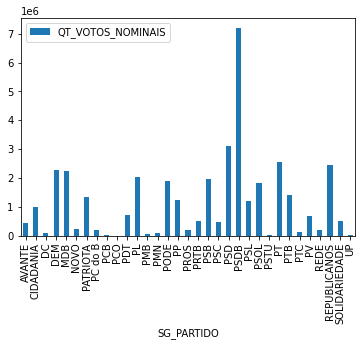

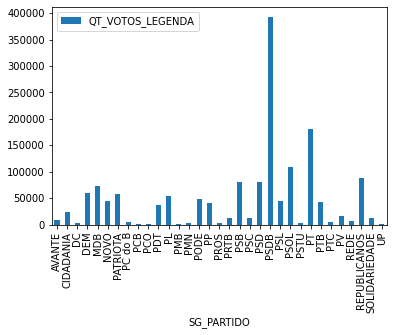

In [ ]:
# Separando os gráficos para melhor visualizar e usando barras
df_EleicaoVotos.groupby(['SG_PARTIDO']).sum().loc[:,['QT_VOTOS_NOMINAIS']].plot.bar()

df_EleicaoVotos.groupby(['SG_PARTIDO']).sum().loc[:,['QT_VOTOS_LEGENDA']].plot.bar()

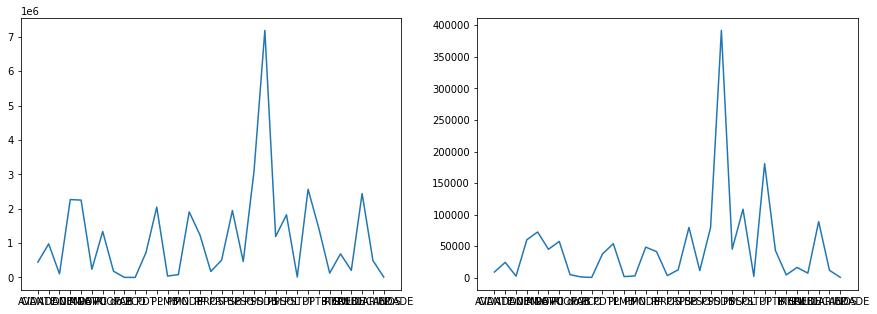

In [ ]:
# tentando usar subplots, por eqto o de barras fica de exercício :-P
# Mas agoora eu ó quero os votos nominais ou só os votos na legenda
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(15,5)) #stateless


axes[0].plot(df_EleicaoVotos.groupby(['SG_PARTIDO']).sum().loc[:,['QT_VOTOS_NOMINAIS']])
axes[1].plot(df_EleicaoVotos.groupby(['SG_PARTIDO']).sum().loc[:,['QT_VOTOS_LEGENDA']])

fig.show()

#dfAgrupadoPorVoto = df_EleicaoVotos.groupby(['SG_PARTIDO']).sum()
#dfAgrupadoPorVoto.head()

In [ ]:
pip install xlrd

     |████████████████████████████████| 96 kB 18.2 MB/s 
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [ ]:
# E se eu quiser saber o resultado por região do Estado de São Paulo: Ex.: votação no Oeste paulista ou na região 
#de Ribeirão Preto?

# Planilha com os municípios e todasa as  regiões (micro e meso)
#ftp://geoftp.ibge.gov.br/organizacao_do_territorio/estrutura_territorial/divisao_territorial/2016/DTB_2016_v2.zip
df_regioes = pd.read_excel('../dataset/DTB_BRASIL_MUNICIPIO.xls',encoding = "Latin 1", sep=';')
#df_regioes = pd.read_excel('../dataset/DTB_BRASIL_MUNICIPIO.xls',encoding = "Latin 1", sep=';')

df_regioes.columns

Index(['UF', 'Nome_UF', 'Mesorregião Geográfica', 'Nome_Mesorregião',
       'Microrregião Geográfica', 'Nome_Microrregião', 'Município',
       'Código Município Completo', 'Nome_Município'],
      dtype='object')

In [ ]:
# Estados
df_regioes.loc[:, 'Nome_UF'].unique()

array(['Rondônia', 'Acre', 'Amazonas', 'Roraima', 'Pará', 'Amapá',
       'Tocantins', 'Maranhão', 'Piauí', 'Ceará', 'Rio Grande do Norte',
       'Paraíba', 'Pernambuco', 'Alagoas', 'Sergipe', 'Bahia',
       'Minas Gerais', 'Espírito Santo', 'Rio de Janeiro', 'São Paulo',
       'Paraná', 'Santa Catarina', 'Rio Grande do Sul',
       'Mato Grosso do Sul', 'Mato Grosso', 'Goiás', 'Distrito Federal'],
      dtype=object)

In [ ]:
# Pegando apenas são paulo, pra começar
df_SaoPaulo = df_regioes.loc[df_regioes['Nome_UF'] == 'São Paulo']
df_SaoPaulo

,UF,Nome_UF,Mesorregião Geográfica,Nome_Mesorregião,Microrregião Geográfica,Nome_Microrregião,Município,Código Município Completo,Nome_Município
3267,35,São Paulo,8,Presidente Prudente,35,Adamantina,105,3500105,Adamantina
3268,35,São Paulo,1,São José do Rio Preto,4,São José do Rio Preto,204,3500204,Adolfo
3269,35,São Paulo,7,Campinas,29,Pirassununga,303,3500303,Aguaí
3270,35,São Paulo,7,Campinas,30,São João da Boa Vista,402,3500402,Águas da Prata
3271,35,São Paulo,7,Campinas,33,Amparo,501,3500501,Águas de Lindóia
...,...,...,...,...,...,...,...,...,...
3907,35,São Paulo,2,Ribeirão Preto,13,Jaboticabal,56909,3556909,Vista Alegre do Alto
3908,35,São Paulo,1,São José do Rio Preto,1,Jales,56958,3556958,Vitória Brasil
3909,35,São Paulo,12,Macro Metropolitana Paulista,46,Sorocaba,57006,3557006,Votorantim
3910,35,São Paulo,1,São José do Rio Preto,3,Votuporanga,57105,3557105,Votuporanga


In [ ]:
# Todas as Mesorregiões de São paulo
print(df_SaoPaulo.loc[:, 'Nome_Mesorregião'].unique())

# Todas as Microrregiões  de São paulo
print(df_SaoPaulo.loc[:, 'Nome_Microrregião'].unique())

# Nome de todos os municipios de São Paulo
print(df_SaoPaulo.loc[:, 'Nome_Município'].unique())

['Presidente Prudente' 'São José do Rio Preto' 'Campinas' 'Bauru'
 'Piracicaba' 'Itapetininga' 'Ribeirão Preto' 'Araçatuba'
 'Macro Metropolitana Paulista' 'Marília' 'Araraquara'
 'Vale do Paraíba Paulista' 'Metropolitana de São Paulo' 'Assis'
 'Litoral Sul Paulista']
['Adamantina' 'São José do Rio Preto' 'Pirassununga'
 'São João da Boa Vista' 'Amparo' 'Avaré' 'Piracicaba' 'Bauru'
 'Itapetininga' 'Presidente Prudente' 'Batatais' 'Birigui' 'Sorocaba'
 'Votuporanga' 'Marília' 'Campinas' 'Araraquara' 'São Carlos' 'Andradina'
 'Botucatu' 'Guaratinguetá' 'Jales' 'Capão Bonito' 'Araçatuba' 'Ituverava'
 'Bananal' 'Limeira' 'Tupã' 'Catanduva' 'Moji Mirim' 'Guarulhos' 'Assis'
 'Bragança Paulista' 'Auriflama' 'Itapeva' 'Jaú' 'Registro' 'Barretos'
 'Ribeirão Preto' 'Osasco' 'Jaboticabal' 'Ourinhos' 'Santos'
 'Mogi das Cruzes' 'Tatuí' 'Rio Claro' 'São José dos Campos' 'Lins'
 'Franco da Rocha' 'Jundiaí' 'Campos do Jordão' 'Caraguatatuba'
 'Itapecerica da Serra' 'Franca' 'Paraibuna/Paraitinga' 'Sã

In [ ]:
# planilha com os dados do primeiro turnos das eleições municipais de 2020
dadosEleicao = pd.read_csv('../dataset/dadosEleitorais/votacao_partido_munzona_2020_SP.csv',encoding = "Latin 1", sep=';')
dadosEleicao.columns

Index(['DT_GERACAO', 'HH_GERACAO', 'ANO_ELEICAO', 'CD_TIPO_ELEICAO',
       'NM_TIPO_ELEICAO', 'NR_TURNO', 'CD_ELEICAO', 'DS_ELEICAO', 'DT_ELEICAO',
       'TP_ABRANGENCIA', 'SG_UF', 'SG_UE', 'NM_UE', 'CD_MUNICIPIO',
       'NM_MUNICIPIO', 'NR_ZONA', 'CD_CARGO', 'DS_CARGO', 'TP_AGREMIACAO',
       'NR_PARTIDO', 'SG_PARTIDO', 'NM_PARTIDO', 'SQ_COLIGACAO',
       'NM_COLIGACAO', 'DS_COMPOSICAO_COLIGACAO', 'ST_VOTO_EM_TRANSITO',
       'QT_VOTOS_NOMINAIS', 'QT_VOTOS_LEGENDA'],
      dtype='object')

In [ ]:
# Tudo uppercase para comparar os valores depois. Alteração permanece
#df_SaoPaulo['Nome_Município'].str.upper()
df_SaoPaulo['Nome_Município'] = df_SaoPaulo['Nome_Município'].str.upper()

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
# Selecionando apenas as colunas que quero contendo as regiões e municípios
df_SaoPaulo_regioes = df_SaoPaulo.loc[:, ['Nome_UF', 'Nome_Mesorregião', 'Nome_Microrregião', 'Nome_Município']]
df_SaoPaulo_regioes.sample(15)

,Nome_UF,Nome_Mesorregião,Nome_Microrregião,Nome_Município
3276,São Paulo,Presidente Prudente,Presidente Prudente,ALFREDO MARCONDES
3796,São Paulo,Ribeirão Preto,Ribeirão Preto,SANTA RITA DO PASSA QUATRO
3575,São Paulo,Vale do Paraíba Paulista,Guaratinguetá,LORENA
3439,São Paulo,Campinas,São João da Boa Vista,ESPÍRITO SANTO DO PINHAL
3590,São Paulo,Assis,Ourinhos,MANDURI
3484,São Paulo,Marília,Tupã,HERCULÂNDIA
3745,São Paulo,Bauru,Bauru,REGINÓPOLIS
3474,São Paulo,Bauru,Bauru,GUARANTÃ
3811,São Paulo,Metropolitana de São Paulo,Santos,SANTOS
3649,São Paulo,Marília,Marília,OCAUÇU


In [ ]:
# Mantém apenas as colunas para identicar a quantidade de votos na legenda
# Já tinhamos feito lá atrás e armazenado na mesma variável, só está aqui por questões
# didáticas (não quero rolar a barra até no começo)
dadosQtVotos = df_dadosEleicao.loc[:, ['NM_MUNICIPIO','QT_VOTOS_NOMINAIS','SG_PARTIDO','QT_VOTOS_LEGENDA']]
dadosQtVotos.sample(15)

,NM_MUNICIPIO,QT_VOTOS_NOMINAIS,SG_PARTIDO,QT_VOTOS_LEGENDA
3189,SÃO PAULO,436,SOLIDARIEDADE,25
11071,SERRA NEGRA,180,PSDB,19
8849,BOITUVA,2043,PSDB,0
6776,DUMONT,534,PATRIOTA,7
5768,GUARULHOS,8741,PSDB,0
11052,ARAÇARIGUAMA,10,PSB,4
4627,RIO DAS PEDRAS,6904,PSDB,0
11079,ILHABELA,575,PC do B,7
2947,SANTA MARIA DA SERRA,291,REPUBLICANOS,9
7360,MONTE MOR,885,PV,16


In [ ]:
# Verificando quais são as colunas
# Quero fazer um join com a coluna de municípios
# Em uma é NM_MUNICIPIO e em outra é Nome_Município
print(df_SaoPaulo_regioes.columns)
print(dadosQtVotos.columns)

Index(['Nome_UF', 'Nome_Mesorregião', 'Nome_Microrregião', 'Nome_Município'], dtype='object')
Index(['NM_MUNICIPIO', 'QT_VOTOS_NOMINAIS', 'SG_PARTIDO', 'QT_VOTOS_LEGENDA'], dtype='object')


In [ ]:
# Igualando o nome da coluna de municipio para fazer o join,
# Para isso vou renomear a coluna da tabela de municípios com o mesmo nome da coluna 
# de municípios da tablea de votos
#lembrar do inplace = True
df_SaoPaulo_regioes.rename(columns={'Nome_Município': 'NM_MUNICIPIO'}, inplace = True)

print(df_SaoPaulo_regioes.columns)
print(dadosQtVotos.columns)

Index(['Nome_UF', 'Nome_Mesorregião', 'Nome_Microrregião', 'NM_MUNICIPIO'], dtype='object')
Index(['NM_MUNICIPIO', 'QT_VOTOS_NOMINAIS', 'SG_PARTIDO', 'QT_VOTOS_LEGENDA'], dtype='object')


In [ ]:
# Join do dataframe de votos com o de regiões na conluna MN_MUNICIPIO
# pesquisar join, merge com pandas
# on = 'NM_MUNICIPIO', pois é a coluna que queremos
# how='left', pois queremos manter todos os votos
df_dadosQtVotosRegiao = pd.merge(dadosQtVotos, df_SaoPaulo_regioes, on='NM_MUNICIPIO', how='left')

print(len(df_dadosQtVotosRegiao))
print(len(dadosQtVotos))

df_dadosQtVotosRegiao.sample(15)

13111
13111


,NM_MUNICIPIO,QT_VOTOS_NOMINAIS,SG_PARTIDO,QT_VOTOS_LEGENDA,Nome_UF,Nome_Mesorregião,Nome_Microrregião
12624,RIO CLARO,1083,PSB,43,São Paulo,Piracicaba,Rio Claro
8472,SOROCABA,9800,PSC,125,São Paulo,Macro Metropolitana Paulista,Sorocaba
6890,AVARÉ,1391,PT,0,São Paulo,Bauru,Avaré
6352,DIADEMA,535,PSC,31,São Paulo,Metropolitana de São Paulo,São Paulo
7192,PIRACICABA,4685,REPUBLICANOS,83,São Paulo,Piracicaba,Piracicaba
1695,JANDIRA,3432,PSB,63,São Paulo,Metropolitana de São Paulo,Osasco
8931,SÃO PAULO,428,NOVO,107,São Paulo,Metropolitana de São Paulo,São Paulo
1107,ITAPECERICA DA SERRA,9625,PL,1705,São Paulo,Metropolitana de São Paulo,Itapecerica da Serra
7569,SÃO PAULO,429,PRTB,32,São Paulo,Metropolitana de São Paulo,São Paulo
7147,SÃO PAULO,6901,PSOL,1613,São Paulo,Metropolitana de São Paulo,São Paulo


In [ ]:
# agrupando por Mesorregião e partido
dfMacroAgrupado = df_dadosQtVotosRegiao.groupby(['Nome_Mesorregião', 'SG_PARTIDO']).sum()
dfMacroAgrupado

QT_VOTOS_NOMINAIS  QT_VOTOS_LEGENDA
Nome_Mesorregião         SG_PARTIDO                                        
Araraquara               AVANTE                      2673               105
                         CIDADANIA                  22109               428
                         DEM                        33584               843
                         MDB                        75323              2179
                         PATRIOTA                   77491              2060
...                                                   ...               ...
Vale do Paraíba Paulista PTC                         8694               204
                         PV                         35516               580
                         REDE                        5282               203
                         REPUBLICANOS               80844              1744
                         SOLIDARIEDADE              29577               637

[409 rows x 2 columns]

In [ ]:
# Verificando os indices e colunsa
dfMacroAgrupado.columns

Index(['QT_VOTOS_NOMINAIS', 'QT_VOTOS_LEGENDA'], dtype='object')

       QT_VOTOS_NOMINAIS  QT_VOTOS_LEGENDA
count       4.090000e+02        409.000000
mean        9.282886e+04       3786.997555
std         2.687850e+05      17057.874973
min         0.000000e+00          0.000000
25%         7.174000e+03        201.000000
50%         2.964700e+04        831.000000
75%         7.810100e+04       2140.000000
max         3.815721e+06     272971.000000
/opt/venv/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='Nome_Mesorregião,SG_PARTIDO'>

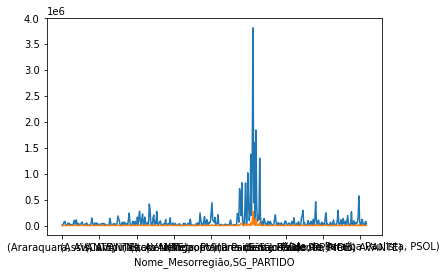

In [ ]:
# Vamos ver como está agora
print(dfMacroAgrupado.describe())

dfMacroAgrupado.QT_VOTOS_NOMINAIS.plot()

dfMacroAgrupado.QT_VOTOS_LEGENDA.plot()


<AxesSubplot:xlabel='Nome_Mesorregião,SG_PARTIDO'>

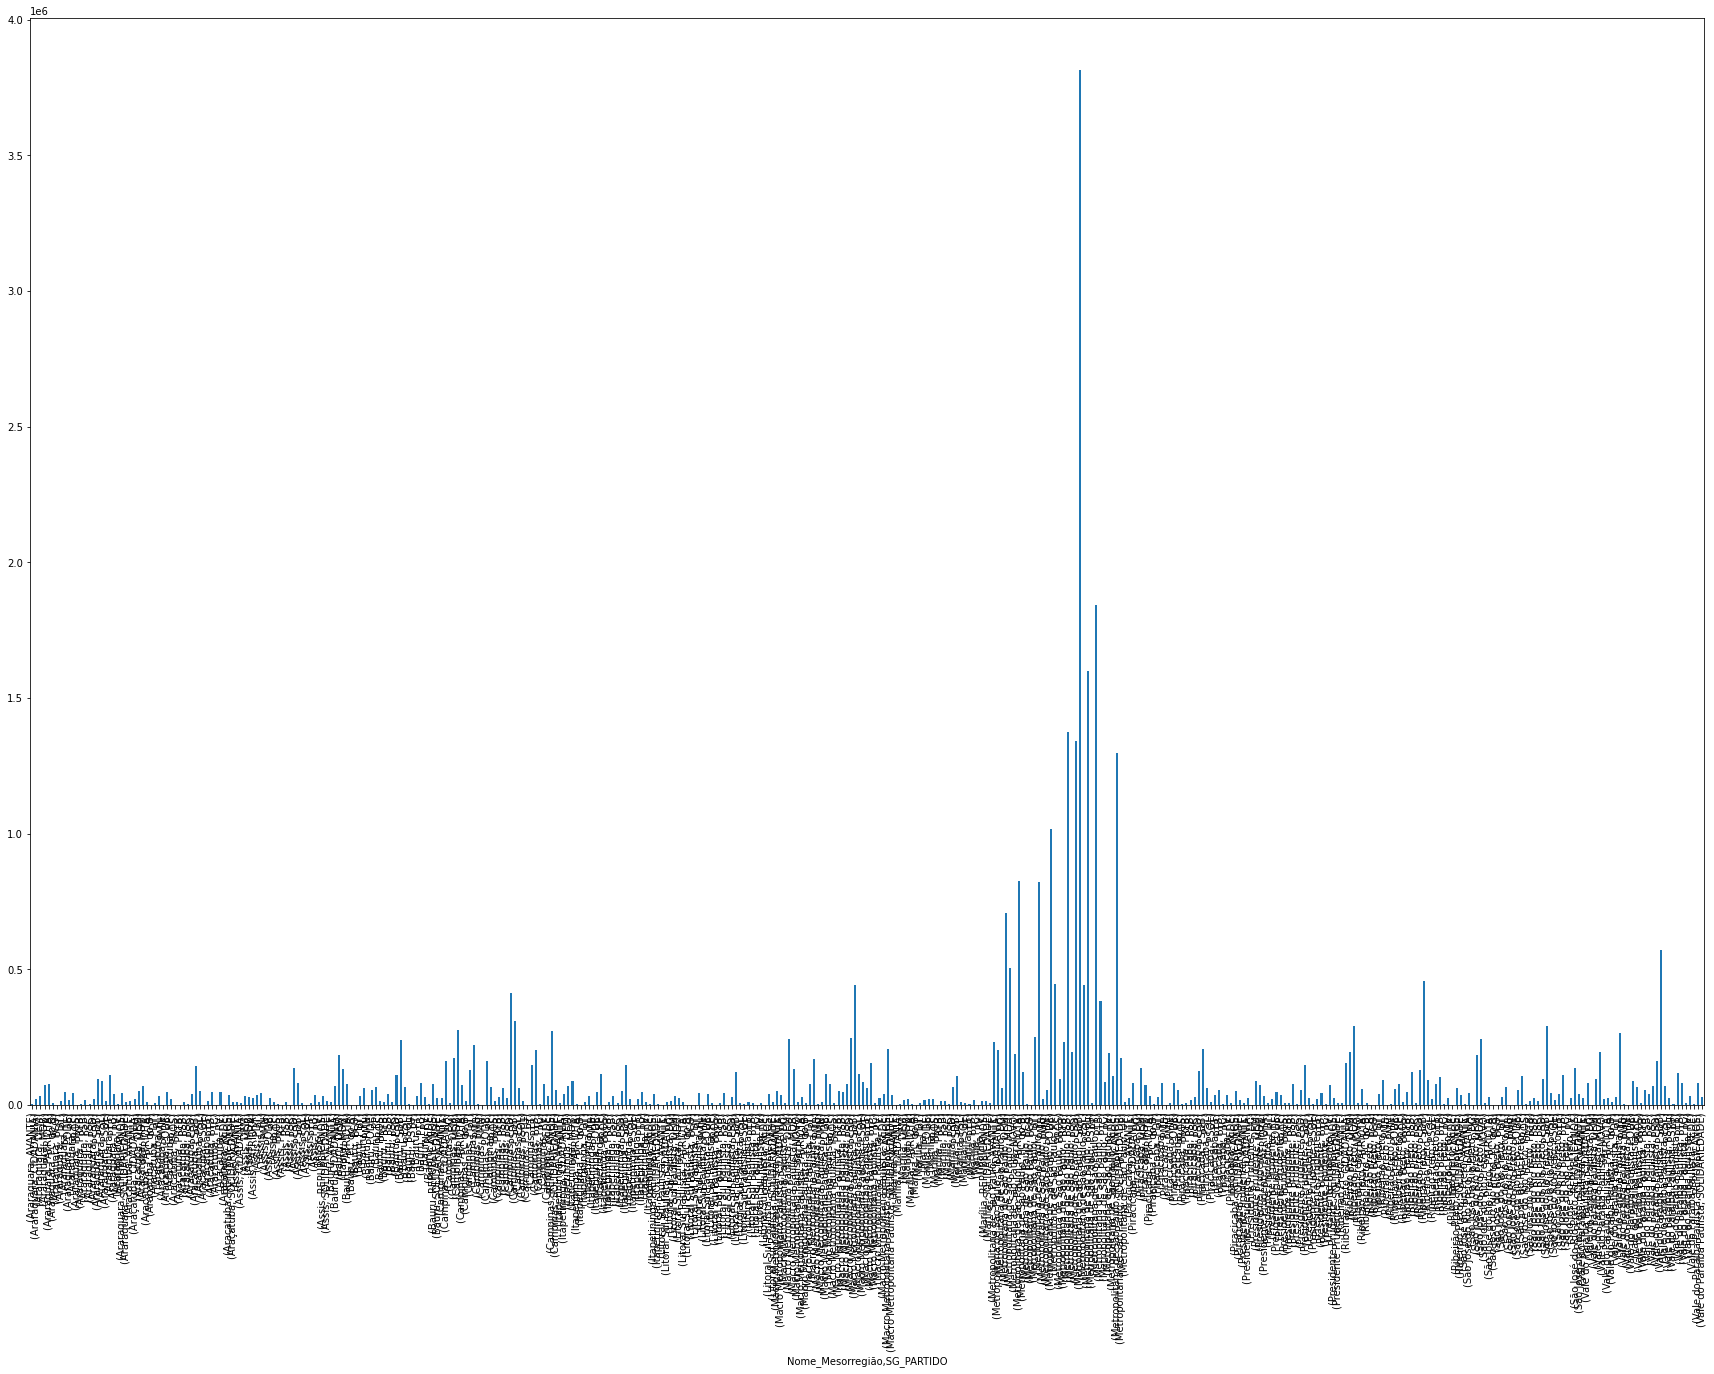

In [ ]:
# Muita informação 
# Aumentar um pouco o gráfico
fig, ax = plt.subplots(figsize = (30,20))

dfMacroAgrupado.QT_VOTOS_NOMINAIS.plot.bar()

dfMacroAgrupado.QT_VOTOS_LEGENDA.plot.bar()


<AxesSubplot:xlabel='Nome_Mesorregião'>

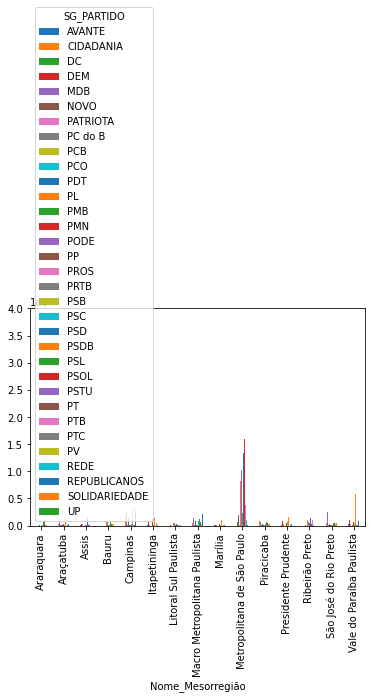

In [ ]:
# tem que melhorar a visualização/posicionamento da legenda, mas melhorou um pouco
df_dadosQtVotosRegiao.groupby(['Nome_Mesorregião', 'SG_PARTIDO']).sum()['QT_VOTOS_NOMINAIS'].unstack().plot.bar()


<AxesSubplot:xlabel='SG_PARTIDO'>

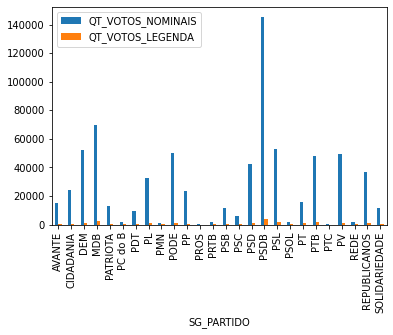

In [ ]:
# Separando os gráficos para melhor visualizar
df_dadosQtVotosRegiao.groupby(['Nome_Mesorregião', 'SG_PARTIDO']).sum().loc['Araçatuba'].plot.bar()

In [ ]:
# Vamos dar uma olhada nas regiões de araçatuba e araraquara agora
dfVotoMacro = dfMacroAgrupado.loc['Araçatuba']
dfVotoMacroAra = dfMacroAgrupado.loc['Araraquara']

<AxesSubplot:xlabel='SG_PARTIDO'>

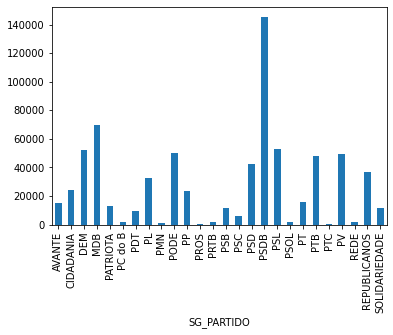

In [ ]:
# Um pouco de estatística descritiva
#print(dfVotoMacro.describe())


dfVotoMacro.QT_VOTOS_NOMINAIS.plot.bar()

<AxesSubplot:xlabel='SG_PARTIDO'>

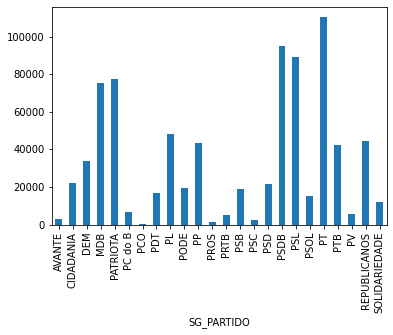

In [ ]:
dfVotoMacroAra.QT_VOTOS_NOMINAIS.plot.bar()

<AxesSubplot:xlabel='SG_PARTIDO'>

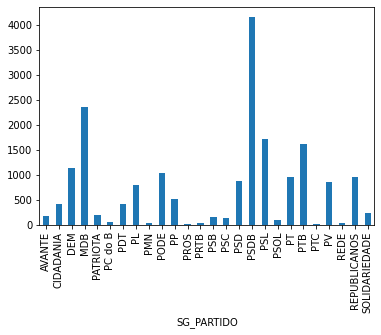

In [ ]:
dfVotoMacro.QT_VOTOS_LEGENDA.plot.bar()

<AxesSubplot:xlabel='SG_PARTIDO'>

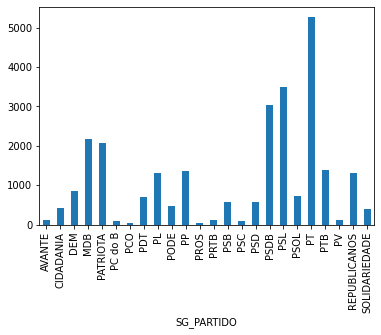

In [ ]:
dfVotoMacroAra.QT_VOTOS_LEGENDA.plot.bar()

In [ ]:
!pip install openpyxl==3.0.5

You should consider upgrading via the '/opt/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
df_dadosQtVotosRegiao.to_csv('../dataset/VotosMesoMacro202001.csv', index = 'False')
df_dadosQtVotosRegiao.to_excel('../dataset/VotosMesoMacro202001.xlsx', index = 'False')

In [ ]:
# Agora é pesquisar matplotlib e pandas e começar a brincar com os gráficos.

# Fazer merge de todas as planilhas de votação para ter os dados para todos os estados 
# e suas meso e macro regiões